In [85]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic

# Load transect densities from Soviet NP data

In [86]:
ef = pd.ExcelFile('../data/transect_densities.xlsx')

sns  = ef.sheet_names

dfs = []

for sn in sns:
    
    df = pd.read_excel('../data/transect_densities.xlsx',sheet_name=sn)
    
    dfs.append(df)
    
len(dfs)

24

# Calculate mean density of each transect, and append to list along with day of year the transect was done on

In [87]:
df

,Unnamed: 0,1988-12-10 00:00:00,1988-12-20 00:00:00,1988-12-30 00:00:00,1989-01-10 00:00:00,1989-01-20 00:00:00,1989-01-31 00:00:00,1989-02-10 00:00:00,1989-02-21 00:00:00,1989-02-28 00:00:00,...,1990-12-30 00:00:00,1991-01-10 00:00:00,1991-01-20 00:00:00,1991-01-31 00:00:00,1991-02-09 00:00:00,1991-02-20 00:00:00,1991-02-28 00:00:00,1991-03-10 00:00:00,1991-03-20 00:00:00,1991-03-31 00:00:00
0,0,0.31,0.31,0.31,0.30,0.31,0.31,0.33,0.35,0.35,...,0.26,0.25,0.23,0.37,0.32,0.33,0.35,0.37,0.33,0.31
1,1,0.30,0.36,0.30,0.32,0.28,0.34,0.34,0.30,0.31,...,0.26,0.28,0.28,0.26,0.29,0.32,0.30,0.38,0.36,0.38
2,2,0.36,0.21,0.29,0.37,0.35,0.40,0.33,0.35,0.33,...,0.18,0.23,0.19,0.29,0.32,0.28,0.38,0.30,0.31,0.36
3,3,0.33,0.32,0.28,0.36,0.32,0.37,0.32,0.31,0.34,...,0.35,0.26,0.24,0.30,0.35,0.36,0.37,0.35,0.38,0.39
4,4,0.22,0.30,0.28,0.30,0.35,0.37,0.30,0.32,0.36,...,0.26,0.22,0.25,0.35,0.27,0.33,0.37,0.31,0.37,0.32
5,5,0.22,0.30,0.34,0.35,0.34,0.27,0.30,0.32,0.33,...,0.19,0.21,0.21,0.22,0.32,0.28,0.31,0.38,0.33,0.32
6,6,0.35,0.27,0.28,0.33,0.34,0.28,0.32,0.30,0.30,...,0.22,0.19,0.26,0.25,0.37,0.37,0.36,0.36,0.37,0.38
7,7,0.29,0.33,0.32,0.30,0.37,0.34,0.37,0.30,0.32,...,0.35,0.20,0.27,0.34,0.30,0.31,0.31,0.33,0.38,0.33
8,8,0.35,0.30,0.31,0.34,0.36,0.38,0.35,0.35,0.32,...,0.30,0.22,0.20,0.23,0.33,0.35,0.32,0.32,0.32,0.30
9,9,0.33,0.29,0.31,0.32,0.35,0.38,0.33,0.33,0.33,...,0.27,0.25,0.25,0.36,0.36,0.35,0.34,0.36,0.33,0.36


In [88]:
mean_densities = []

measurement_counter = 0

for df in dfs:
    
#     print(df)
    
    for col in df.columns[1:]:
        
        count = np.count_nonzero(np.nan_to_num(df[col]))
        measurement_counter+=count

        mean_densities.append( {'doy':col.timetuple().tm_yday,
                                    'den': np.nanmean(df[col])*1000,
                                    }
                                )
        
print(measurement_counter)

4588


/home/robbie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app


In [89]:
mean_densities

[{'doy': 151, 'den': 299.0000009536743},
 {'doy': 162, 'den': 334.0000033378601},
 {'doy': 174, 'den': 368.7499985098839},
 {'doy': 185, 'den': 385.99999845027924},
 {'doy': 314, 'den': 264.9999976158142},
 {'doy': 326, 'den': 260.999995470047},
 {'doy': 334, 'den': 239.9999979469511},
 {'doy': 365, 'den': 297.49999940395355},
 {'doy': 29, 'den': 252.2222250699997},
 {'doy': 58, 'den': 264.4444439146254},
 {'doy': 89, 'den': 274.44444596767426},
 {'doy': 151, 'den': 344.9999988079071},
 {'doy': 181, 'den': 315.0000050663948},
 {'doy': 273, 'den': 196.66667034228644},
 {'doy': 304, 'den': 296.6666618982951},
 {'doy': 329, 'den': 298.3333344260852},
 {'doy': 363, 'den': 313.33333998918533},
 {'doy': 124, 'den': 331.0000002384186},
 {'doy': 153, 'den': 286.0000029206276},
 {'doy': 274, 'den': 204.2857174362455},
 {'doy': 306, 'den': 246.99999690055847},
 {'doy': 340, 'den': 277.0000010728836},
 {'doy': 7, 'den': 265.999998152256},
 {'doy': 35, 'den': 273.99999499320984},
 {'doy': 66, 'den

In [90]:
len(mean_densities)

580

# Turn into dataframe and visualise evolution of transect mean density

[]

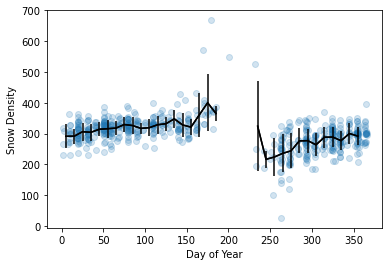

In [91]:
df = pd.DataFrame(mean_densities)

df.dropna(inplace=True)
    
bins = np.arange(0,361,10)

bcs = np.arange(5,361,10)
            
means, bin_edges, bn = binned_statistic(df['doy'],
                                            df['den'],
                                            bins=bins,
                                            statistic='mean')
       
stds, bin_edges, bn = binned_statistic(df['doy'],
                                            df['den'],
                                            bins=bins,
                                            statistic='std')

            
    
plt.scatter(df['doy'], df['den'],alpha=0.2)

plt.plot(bcs,means,color='k')
plt.errorbar(x=bcs,y=means,yerr=stds,color='k')

plt.ylabel('Snow Density')
plt.xlabel('Day of Year')

plt.plot()

# Make data continuous over 1st January, by shifting the discontinuity to 200th day of year

In [92]:
df['doy_adj'] = [-(365-d) if d>200 else d for d in df['doy']]

# Generate x-ticks and x-ticks label

In [93]:
month_start_doys = [0]
counter = 0
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for d in [31,28,31,30,31,30,31,31,31,31,30]:
    counter +=d
    month_start_doys.append(counter)

xticks = [-(365-d) if d>200 else d for d in month_start_doys]

# Plot the data over the winter season

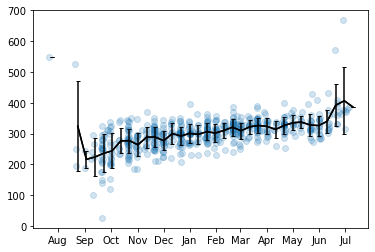

In [94]:
bins = np.arange(-165,201,10)            

means, bin_edges, bn = binned_statistic(df['doy_adj'],
                                            df['den'],
                                            bins=bins,
                                            statistic='mean')
       
stds, bin_edges, bn = binned_statistic(df['doy_adj'],
                                            df['den'],
                                            bins=bins,
                                            statistic='std')

            
    
plt.scatter(df['doy_adj'], df['den'],alpha=0.2)

plt.plot(bins[:-1]+5,means,color='k')
plt.errorbar(x=bins[:-1]+5,y=means,yerr=stds,color='k',capsize=2)

plt.xticks(xticks,labels=month_names)
plt.show()

# Fit a 1st order polynomial to the data.

Turns out that this is basically the same as fitting a 2 or 3rd order one! Line only curves when you get to 4th order.

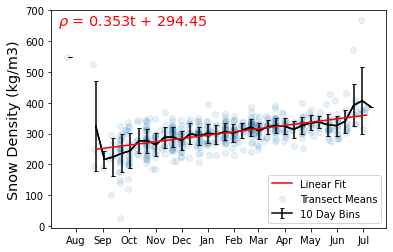

 
0.3534 x + 294.4


In [111]:
x = df['doy_adj']
y = df['den']
z = np.polyfit(x,y,1)

p = np.poly1d(z)

xs = np.arange(-130,190,5)

dens_plot = [den_from_doy(d) for d in xs]

plt.plot(xs,dens_plot,color='r',label='Linear Fit',
         zorder=5)

plt.scatter(x,y,alpha=0.1,label='Transect Means')


plt.plot(bins[:-1]+5,means,color='k')
plt.errorbar(x=bins[:-1]+5,y=means,yerr=stds,color='k',capsize=2,label='10 Day Bins')

plt.xticks(xticks,labels=month_names)
plt.legend()


plt.ylabel('Snow Density (kg/m3)',fontsize='x-large')

plt.annotate(fr'$\rho$ = {np.round(p[1],decimals=3)}t + {np.round(p[0],decimals=2)}',
             xy=(0.02,0.93),xycoords='axes fraction',fontsize='x-large',color='r')

odir = '/home/robbie/Dropbox/Apps/Overleaf/Conductivity/'

plt.savefig(f'{odir}densification.jpg',bbox_inches='tight',dpi=400)

plt.show()

print(p)

In [100]:
p[0]

294.44668324531324

# And here's the formula that should be implemented in the complex model

In [63]:
def den_from_doy(doy):
    if doy>200:
        doy_adj = doy-365
    else:
        doy_adj = doy
        
    den = 294.45 + 0.353*doy_adj
    
    return den